In [1]:
import torch
import numpy as np
import pickle
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from model import MiniVGGNet 
import pandas as pd


In [2]:
results_folder = 'results/results-run-2'

In [3]:

# Load model
num_classes = 6  # Adjust if you have different number of classes
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = MiniVGGNet(num_classes=num_classes)
model.load_state_dict(torch.load(f'{results_folder}/ultrasound_cnn.pth', map_location=device))
model = model.to(device)
model.eval()

print("Model loaded successfully!")

Model loaded successfully!


In [4]:
history = np.load(f'{results_folder}/my_training_history.npz')
train_loss = history['train_loss']
val_loss = history['val_loss']
train_acc = history['train_acc']
val_acc = history['val_acc']

print("Training history loaded!")

Training history loaded!


In [5]:
with open(f'{results_folder}/my_confusion_matrix.pkl', 'rb') as f:
    cm = pickle.load(f)

print("Confusion matrix loaded!")

Confusion matrix loaded!


In [9]:
with open(f'{results_folder}/my_classification_report.json', 'r') as f:
    report = json.load(f)

print("Classification report loaded!")

Classification report loaded!


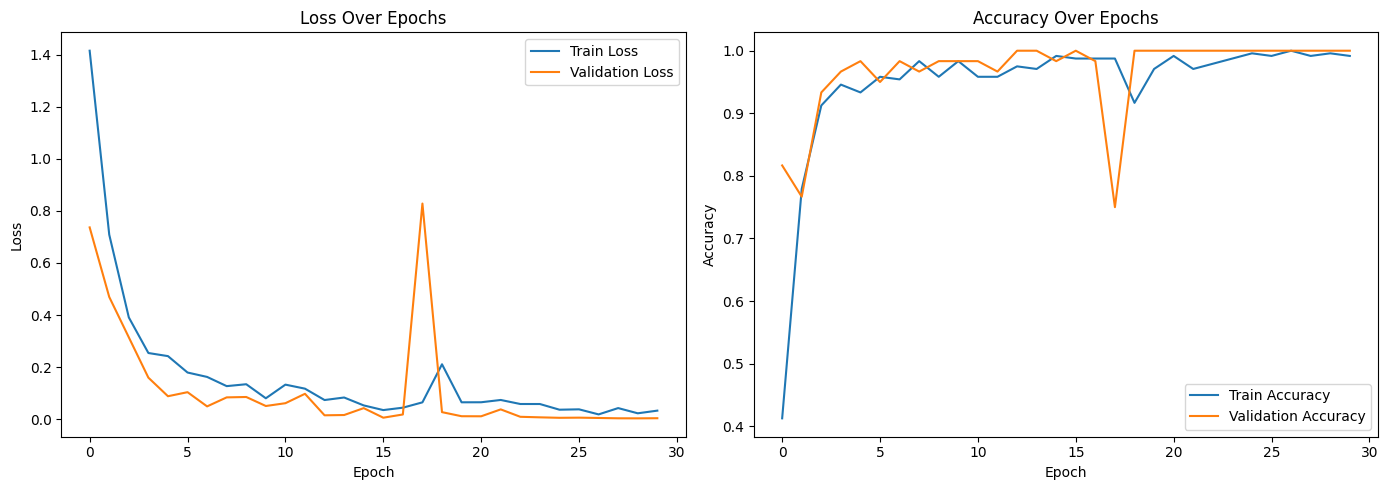

In [10]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


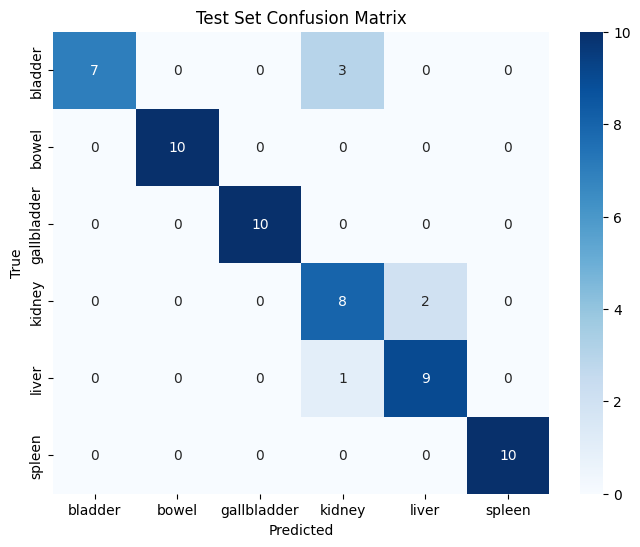

In [7]:
class_labels = ['bladder', 'bowel', 'gallbladder', 'kidney', 'liver', 'spleen']  # adjust if needed

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Set Confusion Matrix')
plt.show()

In [11]:
# Convert report to dataframe
report_df = pd.DataFrame(report).transpose()

# Display nicely
report_df.style.background_gradient(cmap='Blues').format(precision=2)

,precision,recall,f1-score,support
0,1.00,0.70,0.82,10.00
1,1.00,1.00,1.00,10.00
2,1.00,1.00,1.00,10.00
3,0.67,0.80,0.73,10.00
4,0.82,0.90,0.86,10.00
5,1.00,1.00,1.00,10.00
accuracy,0.90,0.90,0.90,0.90
macro avg,0.91,0.90,0.90,60.00
weighted avg,0.91,0.90,0.90,60.00
